In [1]:
import nltk
#nltk.download()
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd

from nltk import FreqDist
from unicodedata import normalize
%matplotlib inline

In [2]:
texto1 = '''
Prezados,
Favor avaliar o tempo de operação da cunsulta.
Realizamos a operação "Receber intimações" junto com o Silvano e tivemos o seguinte resultado.

Obs.: Situação similar encaminhada na salt 240716/45.
                
Coletamos evidências que seguem anexadas.

Servidor: FLNSRVUNJ4109 (172.23.4.109)
Aplicação: SPJ
Cliente: 2807
Chamada: 0182
Data/Hora: 12/04 11:05

=================================================

  WITH OBJS AS ( 
   SELECT 
      W.CDOBJETO,
      W.CDFLUXOTRABALHO,
      W.CDFILA,
     W.TPFILA 
   FROM 
   UNION 
   FROM
....
'''


texto2 = '''
Ambiente: Produção
Servidor APP: local
Versão da aplicação: 4.0.18-83
Nome do usuário: Vlamir Meneguini
Login do usuário: VMENEGUINI
Chefia: PR11 – Procuradoria Regional de Marília
Lotação: Gabinete do procurador Dr Vlamir Meneguini
Data e hora da ocorrência: 19/09/2017 – 15:30 hrs

Descrição da SALT:
Procurador está tentando Classificar as movimentações e o sistema abre uma tela sobreposta logo em cima das manifestações, impossibilitando o procurador de selecionar a desejada.
O problema ocorre quando existem 2 pendências do mesmo processo.
No momento o procurador esta encerrando uma pendência para poder conseguir classificar, depois ele reativa a outra pra classificar e encerra a primeira, depois reativa novamente, isso causa uma grande perda de tempo e o trabalho fica redobrado.
Procurador pediu urgência, pois antes da ultima atualização isso não ocorria

Segue o vídeo e imagem  anexa.

Grato.

Nome e Telefone do Analista: Rodrigo Coneglian 048-99178-4824 / 14 99615-9199


Exemplo de URL:
http://127.0.0.1/
http://127.0.0.1
www.google.com
'''

texto2 = texto2 + '''
Local informado pelo cliente: Agenda
 
 Anexo após o envio do Portal: 
Erro Agenda Vmeneguini.jpg
 
 
 Anexo após o envio do Portal: 
Agenda Vmeneguini.zip
 
 
 Anexo após o envio do Portal: 
Agenda Vlamir 29_09.avi
 
 
 Anexo após o envio do Portal: 
Agenda Vlamir - versão do sistema.zip
 
 
 Anexo após o envio do Portal: 
PR12 - Tela classificar pendencia.jpg
'''


In [3]:
def minusculo(s):
    return s.lower()

In [4]:
def tokenizar(s):
    toke = nltk.word_tokenize(s)
    toke = nltk.pos_tag(toke)
    return toke
#nltk.help.upenn_tagset('NNP')

In [5]:
def contagem_palavras(s):
    contagem = tokenizar(s)
    contagem = FreqDist(contagem)
    return contagem

In [6]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras=[]
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [7]:
def Pontuacao(s):
    return re.sub(r'[-./?!,":;()=\']',' ',s)

In [8]:
stopwords = set(nltk.corpus.stopwords.words('portuguese'))
for letter in range(97,123):
    stopwords.add(chr(letter))
#stopwords

In [9]:
def RemoveStopWords(instancia):
    instancia = instancia.lower()
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    for letter in range(97,123):
        stopwords.add(chr(letter))
    palavras = [i for i in instancia.split() if not i in stopwords]
    stopwords = set(nltk.corpus.stopwords.words('english'))
    palavras = " ".join(palavras)
    palavras = [i for i in palavras.split() if not i in stopwords]
    return (" ".join(palavras))

In [10]:
def RemoveAcentos(s):
    return normalize('NFKD', s).encode('ASCII', 'ignore').decode('ASCII')

In [11]:
def RemoveURL(s):
    # Código-Fonte utilizado para remoção de hashtags e URLs do corpus
    # Remove as hashtags do corpus pattern = re.compile(r'\#\w+') raw = pattern.sub('', raw)
    # Remove as URLs do corpus
    pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return pattern.sub('', s)


In [12]:
FRASES = ['Data/Hora',
    'Servidor APP',
    'Versão da aplicação',
    'Nome do usuário',
    'Login do usuário',
    'Data e hora da ocorrência',
    'Descrição da SALT',
    'Nome e Telefone do AnalistaLocal informado pelo cliente',
    'Anexo após o envio do Portal']

def RemoverFrasesPadrao(s):
    for frase in FRASES:
        s = s.replace(frase, '')
    return s

In [15]:
def TratarTexto(s):
    s = RemoverFrasesPadrao(s)
    s = Pontuacao(s)
    s = minusculo(s)
    s = RemoveAcentos(s)
    s = RemoveStopWords(s)
    s = RemoveURL(s)
    return s

In [16]:
print(TratarTexto(texto1))
print('----')
print(TratarTexto(texto2))


prezados favor avaliar tempo operacao cunsulta realizamos operacao receber intimacoes junto silvano seguinte resultado obs situacao similar encaminhada salt 240716 45 coletamos evidencias seguem anexadas servidor flnsrvunj4109 172 23 4 109 aplicacao spj cliente 2807 chamada 0182 12 04 11 05 objs select cdobjeto cdfluxotrabalho cdfila tpfila union
----
ambiente producao local 4 0 18 83 vlamir meneguini vmeneguini chefia pr11 procuradoria regional marilia lotacao gabinete procurador dr vlamir meneguini 19 09 2017 15 30 hrs procurador tentando classificar movimentacoes sistema abre tela sobreposta logo cima manifestacoes impossibilitando procurador selecionar desejada problema ocorre existem 2 pendencias processo momento procurador encerrando pendencia poder conseguir classificar reativa outra pra classificar encerra primeira reativa novamente causa grande perda tempo trabalho fica redobrado procurador pediu urgencia pois antes ultima atualizacao nao ocorria segue video imagem anexa grato

In [31]:
print (Stemming(TratarTexto(texto2)))

ambi produca local 4 0 18 83 vlam meneguin vmeneguin chef pr11 procurad region maril lotaca gabinet procur dr vlam meneguin 19 09 2017 15 30 hr procur tent classific movimentaco sistem abr tel sobrepost log cim manifestaco impossibilit procur selec desej problem ocorr exist 2 pendenc process moment procur encerr pendenc pod consegu classific reat outr pra classific encerr prim reat nov caus grand perd temp trabalh fic redobr procur ped urgenc poi ant ult atualizaca nao ocorr seg vide imag anex grat nom telefon anal rodrig coneglian 048 99178 4824 14 99615 9199 exempl url http 127 0 0 1 http 127 0 0 1 www googl local inform client agend err agend vmeneguin jpg agend vmeneguin zip agend vlam 29_09 avi agend vlam versa sistem zip pr12 tel classific pendenc jpg


In [32]:
print (tokenizar(TratarTexto(texto2)))

[('ambiente', 'NN'), ('producao', 'VB'), ('local', 'JJ'), ('4', 'CD'), ('0', 'CD'), ('18', 'CD'), ('83', 'CD'), ('vlamir', 'NN'), ('meneguini', 'NN'), ('vmeneguini', 'NN'), ('chefia', 'NN'), ('pr11', 'NN'), ('procuradoria', 'VBP'), ('regional', 'JJ'), ('marilia', 'NNS'), ('lotacao', 'VBP'), ('gabinete', 'JJ'), ('procurador', 'NN'), ('dr', 'NN'), ('vlamir', 'NN'), ('meneguini', 'VBD'), ('19', 'CD'), ('09', 'CD'), ('2017', 'CD'), ('15', 'CD'), ('30', 'CD'), ('hrs', 'NN'), ('procurador', 'NN'), ('tentando', 'NN'), ('classificar', 'NN'), ('movimentacoes', 'NNS'), ('sistema', 'VBD'), ('abre', 'JJ'), ('tela', 'NN'), ('sobreposta', 'NN'), ('logo', 'NN'), ('cima', 'NN'), ('manifestacoes', 'NNS'), ('impossibilitando', 'VBP'), ('procurador', 'NN'), ('selecionar', 'NN'), ('desejada', 'NN'), ('problema', 'NN'), ('ocorre', 'JJ'), ('existem', 'NN'), ('2', 'CD'), ('pendencias', 'NN'), ('processo', 'NN'), ('momento', 'NN'), ('procurador', 'NN'), ('encerrando', 'NN'), ('pendencia', 'NN'), ('poder', 'NN

In [33]:
contagem_palavras(TratarTexto(texto2))

FreqDist({('0', 'CD'): 5, ('agenda', 'NN'): 5, ('procurador', 'NN'): 5, ('classificar', 'NN'): 4, ('vlamir', 'NN'): 4, ('vmeneguini', 'NN'): 3, ('1', 'CD'): 2, ('pendencia', 'NN'): 2, ('zip', 'NN'): 2, ('jpg', 'NN'): 2, ...})

In [34]:
#bigrm = list(nltk.bigrams(s.split()))
#print(*map(' '.join, bigrm), sep=', ')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

def get_bigrams(myString):
    tokenizer = WordPunctTokenizer()
    tokens = tokenizer.tokenize(myString)
    stemmer = PorterStemmer()
    bigram_finder = BigramCollocationFinder.from_words(tokens)
    bigrams = bigram_finder.nbest(BigramAssocMeasures.chi_sq, 500)

    for bigram_tuple in bigrams:
        x = "%s %s" % bigram_tuple
        tokens.append(x)

    result = [' '.join([stemmer.stem(w).lower() for w in x.split()]) for x in tokens if x.lower() not in stopwords.words('english') and len(x) > 8]
    return result

contagem = FreqDist(get_bigrams(TratarTexto(texto2)))
contagem

FreqDist({'procurador': 5, 'classificar': 4, 'vmeneguini': 3, 'pendencia': 3, 'meneguini': 2, 'gabinet procurador': 1, 'nao ocorria': 1, 'urgencia poi': 1, 'selecionar desejada': 1, 'perda tempo': 1, ...})

In [35]:
bigrm = list(nltk.bigrams(TratarTexto(texto2).split()))
#print(*map(' '.join, bigrm), sep=', ')
contagem = map(' '.join, bigrm)
contagem = FreqDist(contagem)
contagem

FreqDist({'vlamir meneguini': 2, '0 1': 2, 'agenda vmeneguini': 2, '0 0': 2, '127 0': 2, 'agenda vlamir': 2, 'http 127': 2, 'nao ocorria': 1, 'selecionar desejada': 1, 'procurador dr': 1, ...})

In [36]:
from nltk import word_tokenize
from nltk.util import ngrams
token=nltk.word_tokenize(TratarTexto(texto2))
bigrams=ngrams(token,2)
trigrams=ngrams(token,3)
#FreqDist(bigrams)
FreqDist(trigrams)

FreqDist({('0', '0', '1'): 2, ('127', '0', '0'): 2, ('http', '127', '0'): 2, ('15', '30', 'hrs'): 1, ('pra', 'classificar', 'encerra'): 1, ('ocorre', 'existem', '2'): 1, ('processo', 'momento', 'procurador'): 1, ('pr11', 'procuradoria', 'regional'): 1, ('trabalho', 'fica', 'redobrado'): 1, ('29_09', 'avi', 'agenda'): 1, ...})

In [28]:
def frequencia(s, most):
    palavras = contagem_palavras(s)
    print (palavras.most_common(most))
    print (palavras.max())
    print (palavras.most_common(most)[0])
    #print (palavras.freq(6))
    #rint (palavras.tabulate)
    #list(ngrams(mylist, 2))
    palavras.plot(10) #graphical plot of the frequency distribution
    #palavras.plot(cumulative=True) #cumulative plot of the frequency distribution
    
    return 
    #palavras = palavras.keys()
    y_pos = np.arange(len(palavras))
    contagem = palavras.values()
    plt.bar(y_pos, contagem, align='center', alpha=0.5)
    plt.xticks(y_pos, palavras)
    plt.ylabel('Frequencia')
    plt.title('Frequencia das palavras na frase')
    plt.show()

[(('0', 'CD'), 5), (('agenda', 'NN'), 5), (('procurador', 'NN'), 5), (('classificar', 'NN'), 4), (('vlamir', 'NN'), 4), (('vmeneguini', 'NN'), 3), (('1', 'CD'), 2), (('pendencia', 'NN'), 2), (('zip', 'NN'), 2), (('jpg', 'NN'), 2)]
('0', 'CD')
(('0', 'CD'), 5)


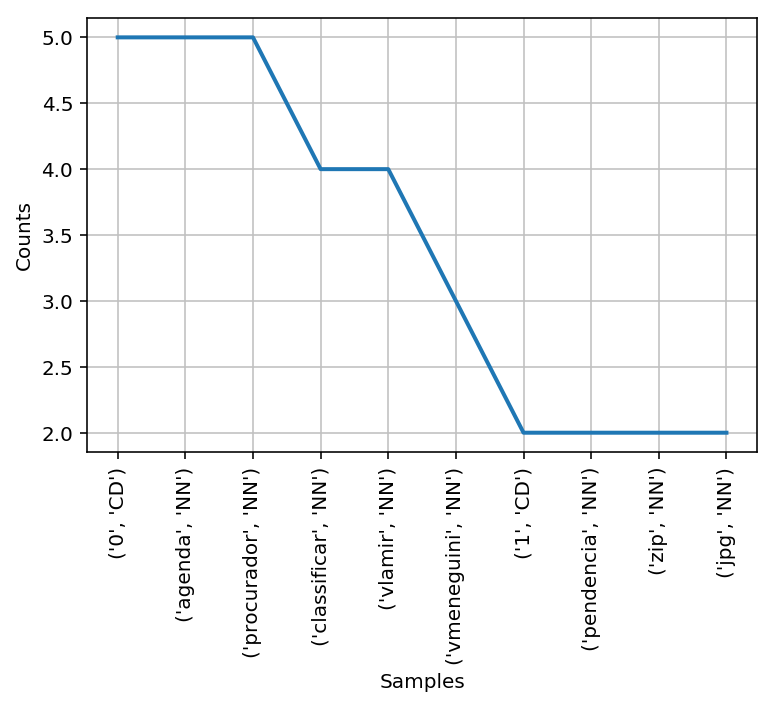

In [37]:
frequencia(TratarTexto(texto2), 10)

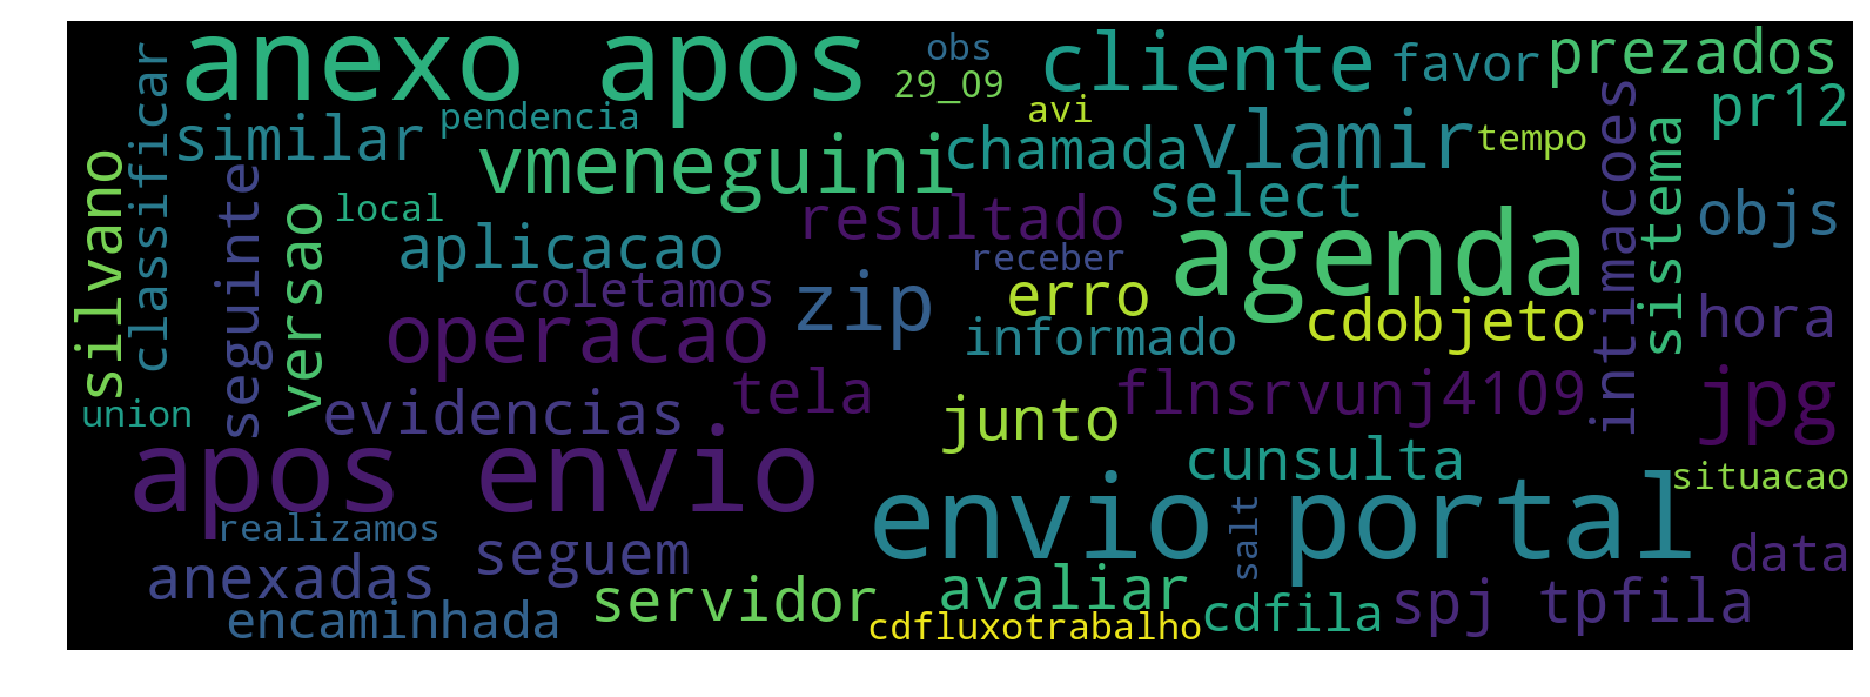

In [41]:
#pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(s)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [39]:
Atendimento = []
Original = []
Tratado = []
Flexionadas = []
#Token = []
#Contagem = []
#Bigrams = []
#Trigrams = []

Atendimento.append(1)
Original.append(texto1)
Tratado.append(TratarTexto(texto1))
Flexionadas.append(Stemming(TratarTexto(texto1)))
#Token = tokenizar(texto1)
#Contagem = contagem_palavras(texto1)
#Bigrams = ''
#Trigrams = ''

Atendimento.append(2)
Original.append(texto2)
Tratado.append(TratarTexto(texto2))
Flexionadas.append(Stemming(TratarTexto(texto2)))
#Token = tokenizar(texto2)
#Contagem = contagem_palavras(texto2)
#Bigrams = ''
#Trigrams = ''

df = pd.DataFrame(
    {'Atendimento': Atendimento,
     'Original': Original,
     'Tratado': Tratado,
     'Flexionadas': Flexionadas
    })
df

,Atendimento,Flexionadas,Original,Tratado
0,1,prez favor avali temp operaca cunsult realiz o...,"\nPrezados,\nFavor avaliar o tempo de operação...",prezados favor avaliar tempo operacao cunsulta...
1,2,ambi produca local 4 0 18 83 vlam meneguin vme...,\nAmbiente: Produção\nServidor APP: local\nVer...,ambiente producao local 4 0 18 83 vlamir meneg...
